# 1. SARIMAX(0, 1, 3)x(1, 0, [1], 12)	

In [1]:
import pandas as pd
import numpy as np
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose  # for ETS Plots

In [2]:
df = pd.read_csv("co2_mm_mlo.csv")
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [3]:
df["date"] = pd.to_datetime(dict(year = df["year"], month = df["month"], day = 1))
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [4]:
df.set_index("date", inplace = True)
df.index.freq = "MS"
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [5]:
train = df.iloc[:717]
test = df.iloc[717:]

In [6]:
model = SARIMAX(train["interpolated"], order = (0,1,3), seasonal_order = (1,0,1,12))
result = model.fit()

In [7]:
start = len(train)
end = start + len(test) - 1
predictions = result.predict(start = start, end = end, dynamic = False).rename("SARIMAX(0,1,3)x(1,0,[1],12)")

In [8]:
for i in range(len(predictions)):
    print(f'predictions:{predictions[i]} test:{test["interpolated"][i]}')

predictions:406.6106170802951 test:406.81
predictions:407.826523604385 test:407.96
predictions:408.5797556723001 test:408.32
predictions:409.4849230225446 test:409.41
predictions:411.04459507215836 test:410.24
predictions:411.64809296060724 test:411.24
predictions:410.8665585387746 test:410.79
predictions:409.1751691203212 test:408.71
predictions:407.0749330060222 test:406.99
predictions:405.62520520219965 test:405.51
predictions:405.8971618803808 test:406.0
predictions:407.4320498992905 test:408.02


C:\Users\hankc\AppData\Local\Temp\ipykernel_3992\435430180.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'predictions:{predictions[i]} test:{test["interpolated"][i]}')


[Text(0.5, 0, ''), Text(0, 0.5, 'parts per million')]

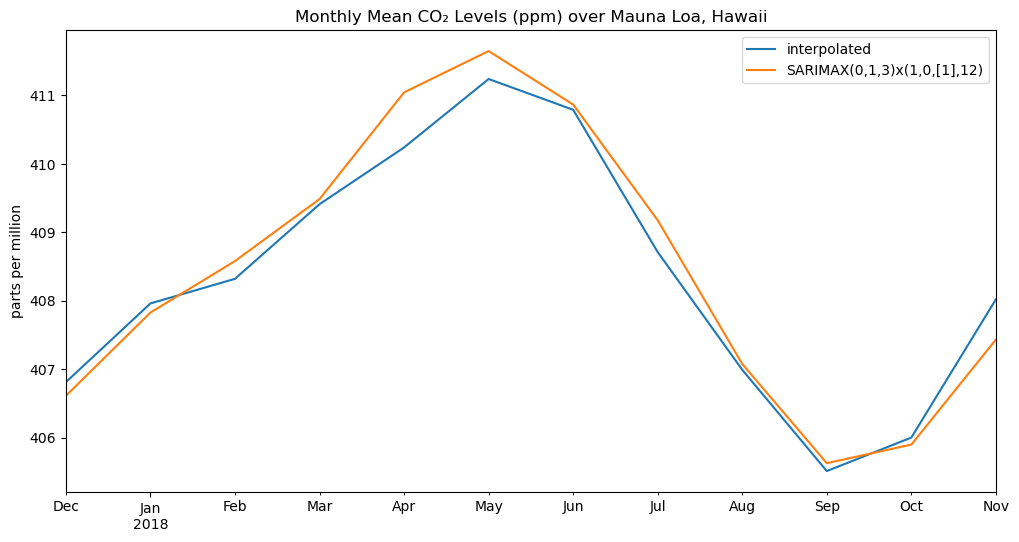

In [9]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel = 'parts per million'
xlabel = ''
ax = test['interpolated'].plot(legend = True, figsize = (12,6), title = title)
predictions.plot(legend = True)
ax.autoscale(axis='x', tight = True)
ax.set(xlabel = xlabel, ylabel = ylabel)

# 2. 梯度下降練習

[-5.   -2.   -0.8  -0.32 -0.13 -0.05]


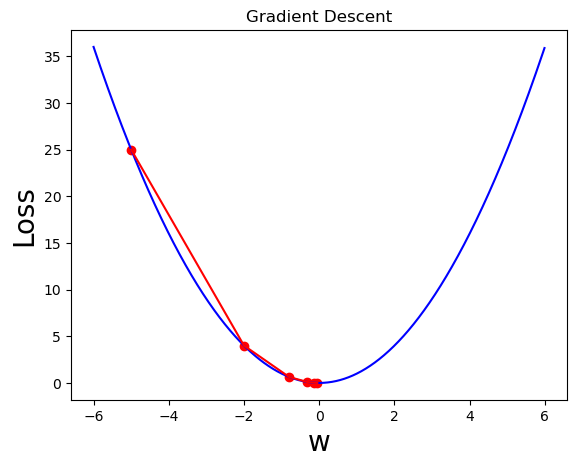

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數(損失函數): y = x ^ 2
def func(x): return x ** 2

# 目標函數的一階導數: dy / dx = 2 * x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在 epochs 次反覆運算中 x 的更新值
        :param x_start: x 的起始點 
        :param df: 目標函數的一階導函數
        :param epochs: 反覆運算週期
        :param lr: 學習率
        :return: x 在每次反覆運算後的位置（包括起始點），長度為 epochs + 1
     """    
    xs = np.zeros(epochs + 1)
    w = x_start
    xs[0] = w
    for i in range(epochs):
        dx = df(w)        
        # 權重的更新 W_new
        # W_new = W — learning_rate * gradient       
        w += - dx * lr 
        xs[i + 1] = w
    return xs

# Main
# 起始權重
x_start = -5
# 執行週期數
epochs = 5
# 學習率
lr = 0.3
# 梯度下降法
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr = lr)
print (np.around(w, 2))
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c = color, label='lr={}'.format(lr))
plt.scatter(w, func(w), c = color)

from matplotlib.font_manager import FontProperties
plt.title('Gradient Descent')
plt.xlabel('w', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.show()

# 3. Tensorflow 練習

In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data > 0] = 1

# 將轉換後二維內容顯示出來，隱約可以看出數字為5
text_image = []
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

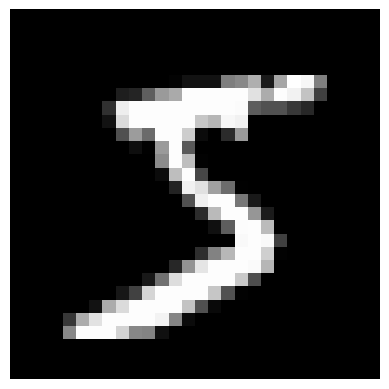

In [14]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off')

# 顯示圖形
plt.show()

In [15]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [16]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2), # 隨機丟棄20$的神經元減少過擬合
  tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\hankc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam', # adam會動態調整學習律
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train_norm, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8471 - loss: 0.5215 - val_accuracy: 0.9572 - val_loss: 0.1554
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9516 - loss: 0.1635 - val_accuracy: 0.9614 - val_loss: 0.1272
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9643 - loss: 0.1226 - val_accuracy: 0.9694 - val_loss: 0.1033
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9708 - loss: 0.0986 - val_accuracy: 0.9703 - val_loss: 0.0970
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9729 - loss: 0.0837 - val_accuracy: 0.9725 - val_loss: 0.0917


In [19]:
score = model.evaluate(x_test_norm, y_test, verbose = 0)
for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0831
compile_metrics: 0.9742
